### dice roll example - Law of Large Numbers 

In [1]:
# dice roll - simulates rolling two six-sided dice until you get a roll of both dice showing a 1.
import random
total_count = 0

while True:
    total_count += 1
    d1, d2 = random.randint(1,6), random.randint(1,6)
    print('dice 1: ', d1, "dice 2: ", d2)
    if d1 ==  1 and d2 == 1: break

print("Total count of dice rolls", total_count)


print(f"probability is 1/{total_count:.0f}")
print(f"percentage is {1/(total_count):.0%}")


dice 1:  3 dice 2:  5
dice 1:  6 dice 2:  1
dice 1:  2 dice 2:  1
dice 1:  2 dice 2:  3
dice 1:  2 dice 2:  5
dice 1:  1 dice 2:  1
Total count of dice rolls 6
probability is 1/6
percentage is 17%


In [2]:
# dice roll - simulates rolling two six-sided dice until you get a roll of both dice showing a 1.
# მოდელის გაშვება 100-ჯერ
import random
total_count = 0
repeat_number = 3

for i in range(repeat_number):
    while True:
        total_count += 1
        d1, d2 = random.randint(1,6), random.randint(1,6)
        print('dice 1: ', d1, "dice 2: ", d2)
        if d1 ==  1 and d2 == 1: break
    print("Loop number: ", i+1)

    print("Total count of dice rolls", total_count)


print(f"probability is 1/{total_count/repeat_number:.0f}")
print(f"percentage is {1/(total_count/repeat_number):.0%}")

dice 1:  1 dice 2:  2
dice 1:  1 dice 2:  6
dice 1:  3 dice 2:  5
dice 1:  1 dice 2:  1
Loop number:  1
Total count of dice rolls 4
dice 1:  1 dice 2:  5
dice 1:  1 dice 2:  2
dice 1:  4 dice 2:  2
dice 1:  2 dice 2:  3
dice 1:  1 dice 2:  1
Loop number:  2
Total count of dice rolls 9
dice 1:  3 dice 2:  1
dice 1:  3 dice 2:  6
dice 1:  6 dice 2:  3
dice 1:  5 dice 2:  4
dice 1:  4 dice 2:  5
dice 1:  3 dice 2:  3
dice 1:  3 dice 2:  6
dice 1:  1 dice 2:  2
dice 1:  4 dice 2:  6
dice 1:  1 dice 2:  3
dice 1:  5 dice 2:  4
dice 1:  4 dice 2:  2
dice 1:  2 dice 2:  1
dice 1:  4 dice 2:  4
dice 1:  1 dice 2:  3
dice 1:  3 dice 2:  1
dice 1:  1 dice 2:  1
Loop number:  3
Total count of dice rolls 26
probability is 1/9
percentage is 12%


 ## Probability Calculation with Python

### kaggle dataset - US Health Insurance Dataset
This dataset contains 1338 rows of insured data, where the Insurance charges are given against the following attributes of the insured: Age, Sex, BMI, Number of Children, Smoker and Region. There are no missing or undefined values in the dataset.
Link: https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset/
This is a demonstration of how we could utilize Python to solve probability and statistical problems, covering a simple probability, conditional probability, continous variable, categorical variable, correlation coefficient and statistical testing problem.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.stats import norm

In [4]:
pd.plotting.register_matplotlib_converters()
# plt.style.use("seaborn-whitegrid")
pd.set_option("display.max_columns", 500)
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.shape

(1338, 7)

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### Probability of Categorical Variable

$$P(E)=\frac{\text{number of event E occurs in a trial}}{\text{total trials}}$$

In [9]:
male_data = df[df["sex"] == "male"]["sex"].count()
total_data = df["sex"].count()

probability = male_data/total_data
probability


0.5052316890881914

$$
\begin{align*}
P(A \ | \ B) &= \cfrac{n(A \cap B)}{n(B)} &= \cfrac{\text{(number of event A and B occur in a trial)}}{\text{(total number of event B)}}
\end{align*}
$$

In [10]:
filter_clause = (df["smoker"] == "yes") & (df["region"] == "northwest")
smoker_in_northwest = df[filter_clause]["smoker"].count()
total_smoker = df[df["smoker"] == "yes"]["smoker"].count()

conditional_probability = smoker_in_northwest/total_smoker
conditional_probability

0.2116788321167883

### Probability of Continous Variable

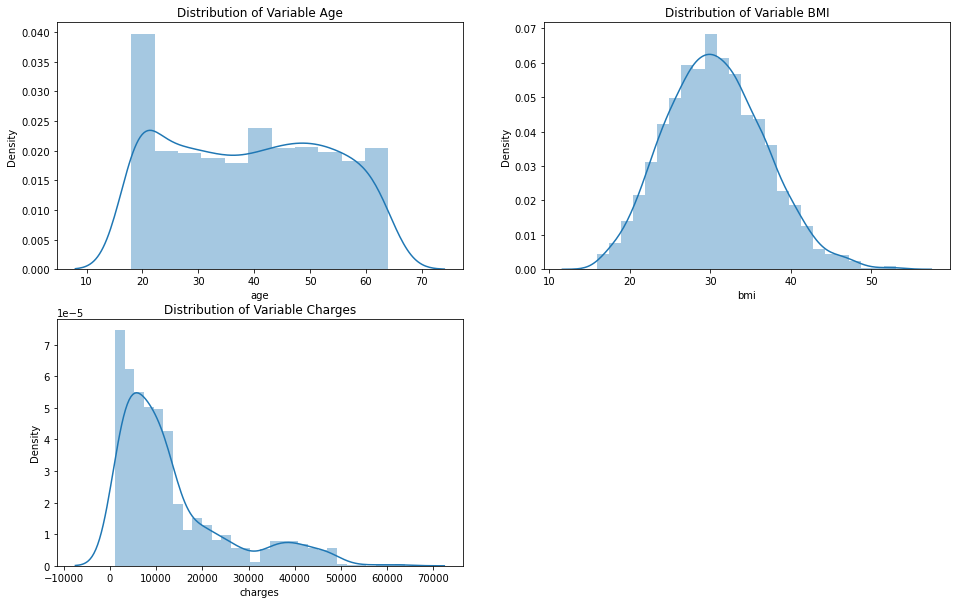

In [11]:
fig = plt.figure(figsize=(16, 10))

plt.subplot(221)
ax1 = sns.distplot(df["age"])
plt.title(f"Distribution of Variable Age")

plt.subplot(222)
ax2 = sns.distplot(df["bmi"])
plt.title(f"Distribution of Variable BMI")

plt.subplot(223)
ax3 = sns.distplot(df["charges"])
plt.title(f"Distribution of Variable Charges")

plt.show()

In [12]:
# Cumulative distribution function (cdf)
# cdf(x, loc=0, scale=1)
age_x = 40
age_mean = df["age"].mean()
age_std_dev = df["age"].std()
age_probability = norm.cdf(age_x, age_mean, age_std_dev)
age_probability

0.5225042071304686

In [13]:
bmi_x = 25
bmi_mean = df["bmi"].mean()
bmi_std_dev = df["bmi"].std()
bmi_probability = norm.cdf(bmi_x, bmi_mean, bmi_std_dev)
bmi_probability

0.17652183661410803

In [14]:
1 - bmi_probability

0.823478163385892

# Random Variables

## Discrete Random Variable

### Definition of a Random Variable

- Random variable $X$: mapping from sample space $S$ to a real line $R$
- Numerical value $X(w)$ mapped to each outcome $w$ of a particular experiment

### Probability Mass Function

- Probability Mass Function (p.m.f.): set of probability values $p_i$ assigned to each value taken by the discrete random variable $x_i$
- $ 0 \leq p_i \leq 1 \text{ and } \sum_i p_i = 1$
- Probability: $P(X = x_i) = p_i$

### Cumulative Distribution Function

- Cumulative Distribution Function (CDF): $F(x) = P(X \leq x)$

## Continuous Random Variables

### Probability Density Function

- Probability Density Function (pdf): 
\begin{equation}
    f(x) \geq 0
\end{equation}
\begin{equation}
    \int_{-\infty}^{\infty} f(x) dx = 1
\end{equation}


### Cumulative Distribution Function


- Cumulative Distribution Function for continuous Random Variables:
    - $F(x) = \int_{-\infty}^x f(y) dy$
    - $f(x) = \frac{dF(x)}{dx}$
    - $P(a < X < b) = F(b) - F(a)$
    - $P(a < X < b) = P(a \leq X \leq b) = P(a \leq X < b) = P(a < X \leq b)$

## მათემატიკური ლოდინი - Expectation of a Random Variable

### Expectations of Discrete Random Variables

- Expectation of a discrete random variable $X$ with p.m.f. $p$:
\begin{equation}
    E(X) = \sum_i p_i x_i
\end{equation}



In [15]:
# Calculate the expectation of Discrete variables

# Input
x = [1, 2, 3, 4, 5]
p = [0.2, 0.2, 0.2, 0.2, 0.2]

# Cal
exp = 0
for i, j in zip(x, p):
    exp += i * j

# Output
print('Expectation: {}'.format(exp))

Expectation: 3.0


In [16]:
# rv_discrete() is a base class to construct specific distribution classes and instances for discrete random variables. 
# It can also be used to construct an arbitrary distribution defined by a list of support points and corresponding probabilities.
from scipy.stats import rv_discrete

x = [1, 2, 3, 4, 5]
p = [0.2, 0.2, 0.2, 0.2, 0.2]
# x = [10, 20, 30]
# p = [0.2, 0.3, 0.5]
distribution = rv_discrete(values=(x, p))
print("Expected value: ", distribution.expect())

Expected value:  3.0


 ### Discrete Probability Distributions

## The Binomial Distribution

### Bernoulli Random Variables

- Modeling of a process with two possible outcomes, labeled 0 and 1
- Random variable defined by the parameter $p$, $0 \leq p \leq 1$, which is the probability that the outcome is 1
- The Bernoulli distribution $Ber(p)$ is:
\begin{equation}
    f(x;p) = p^x(1-p)^{1-x}, \text{   } x= 0,1
\end{equation}
- $E(X) = p$
- $Var(X) = p(1-p)$

In [17]:
from scipy.stats import bernoulli
n = 4
p = 0.3 # probability of success
print("Mean: ", bernoulli.mean(p))
print("Variance: ", bernoulli.var(p))

Mean:  0.3
Variance:  0.21


### Definition of the Binomial Distribution

- Let's consider and experiment consisting of $n$ Bernoulli trials $X_1, \cdots, X_n$ independent and with a constant probability $p$ of success
- Then the total number of successes $X = \sum_{i=1}^m X_i$ is a random variable whose Binomial distribution with parameters $n$ (number of trials) and $p$ is:
\begin{equation}
    X \sim B(n,p)
\end{equation}

- Probability mass function of a $B(n, p)$ random variable is:
\begin{equation}
    f(x;n,p) = \binom{n}{x}p^x(1-p)^{n-x}, \text{   } x= 0,1, \cdots, n
\end{equation}
- $E(X) = np$
- $Var(X) = np(1-p)$

In [18]:
from scipy.stats import binom

# Parameters
n = 10 # number of trials
x = 7 # number of successes
p = 0.2 # probability of success

print("Mean: ", binom.mean(n, p))
print("Variance: ", binom.var(n, p))
print("Probability mass function: ", binom.pmf(x, n, p))
print("Cumulative distribution function: ", binom.cdf(x,n,p))

Mean:  2.0
Variance:  1.6
Probability mass function:  0.0007864320000000006
Cumulative distribution function:  0.9999220736
